# Digital elevation maps in Python using SigmaEpsilon.Mesh and OpenCV

The following parameters govern the actual dimensions of the resulting mesh.

In [2]:
target_width = 280.0
target_height = 90.0
target_elevation = 40.0

height_offset = 250
elevation_offset = 1.0

target_ratio = target_height / target_width

## We read in the height and the terrain from png files and use them as NumPy arrays.

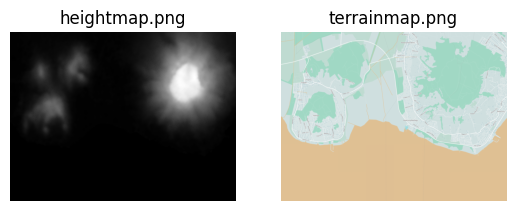

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

heightmap = cv2.imread(r'/home/cherry/terrain/digital-elevation-map/files/heightmap.png')
terrainmap = cv2.imread(r'/home/cherry/terrain/digital-elevation-map/files/terrainmap.png')

heightmap = cv2.cvtColor(heightmap, cv2.COLOR_RGB2GRAY)

heightmap_array = np.array(heightmap)
terrainmap_array = np.array(terrainmap)

fig, axs = plt.subplots(1, 2) 

axs[0].imshow(heightmap_array, cmap='gray')
axs[0].set_title('heightmap.png')
axs[0].axis('off')  

axs[1].imshow(terrainmap_array)
axs[1].set_title('terrainmap.png')
axs[1].axis('off') 

plt.show()

In [4]:
heightmap_array.shape

(750, 1000)

## We crop the images to the desired size and shape.

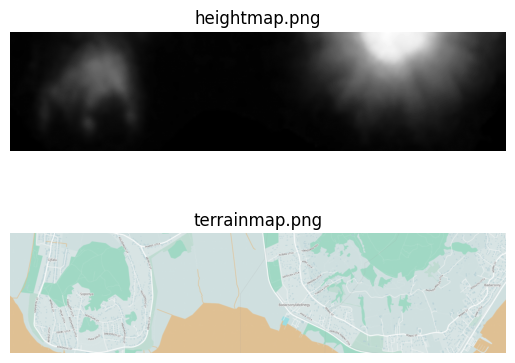

In [5]:
heightmap_width = heightmap_array.shape[0]
cropped_height = int(target_ratio * heightmap_width)

h0 = height_offset
h1 = height_offset + cropped_height
heightmap_array = heightmap_array[h0:h1, :]
terrainmap_array = terrainmap_array[h0:h1, :]

fig, axs = plt.subplots(2, 1)  

axs[0].imshow(heightmap_array, cmap='gray')
axs[0].set_title('heightmap.png')
axs[0].axis('off') 

axs[1].imshow(terrainmap_array)
axs[1].set_title('terrainmap.png')
axs[1].axis('off') 

plt.show()

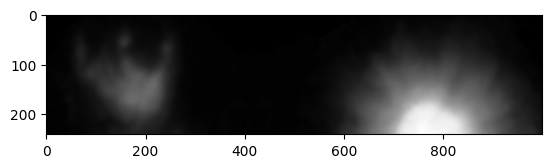

In [6]:
heightmap_array = np.flipud(heightmap_array)
plt.imshow(heightmap_array, cmap='gray')
plt.show()
heightmap_array = np.flipud(heightmap_array)

In [7]:
pip install sigmaepsilon.core

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install dewloosh.plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip show sigmaepsilon-mesh


Name: sigmaepsilon.mesh
Version: 2.3.3
Summary: A Python package to build, manipulate and analyze polygonal meshes.
Home-page: https://github.com/sigma-epsilon/sigmaepsilon.mesh
Author: Bence Balogh
Author-email: bencebalogh@sigmaepsilon.com
License: MIT
Location: /home/cherry/.local/lib/python3.10/site-packages
Requires: fsspec, meshio, numpy, pillow, sectionproperties, sigmaepsilon-deepdict, sigmaepsilon-math, toml, triangle
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
print(dir(cd))  


['Geometry', '__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hasattr__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_attr_map_', '_container', '_db', '_get_cell_slicer', '_get_points_and_range', '_is_protocol', '_parse_gauss_data', '_pointdata', '_rotate_', 'area', 'areas', 'boundary', 'centers', 'container', 'coords', 'data_class', 'db', 'detach_points_cells', 'extract_surface', 'flip', 'frames', 'from_parquet', 'glob_to_loc', 'jacobian', 'jacobian_matrix', 'label', 'length', 'lengths', 'loc_to_glob', 'local_coordinates', 'loca

In [13]:

print(dir(poly_data))


['__annotations__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__join_parent__', '__le__', '__leave_parent__', '__len__', '__lt__', '__missing__', '__module__', '__ne__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_bid2b', '_celldata', '_cid2bid', '_config', '_create_mappers_', '_detach_block_data_', '_frame_class_', '_get_config_', '_has_plot_scalars_', '_in_all_celldata_', '_in_all_pointdata_', '_init_config_', '_is_protocol', '_k3d_config_key_', '_key', '_locked', '_name', '_parent', '_point_array_class_', '_point_class_', '_pointdata', '_pv_config_key_', 

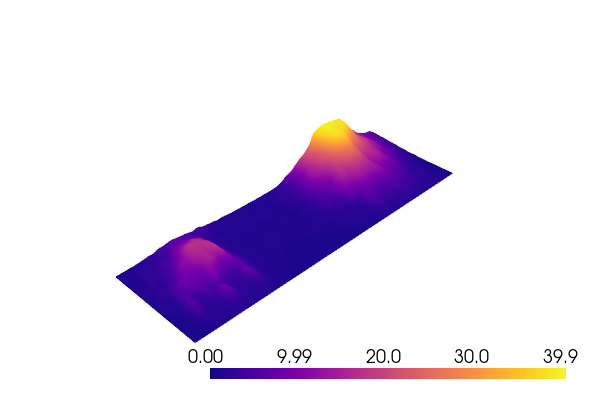

In [96]:
from sigmaepsilon.mesh import PolyData, PointData, CartesianFrame
from sigmaepsilon.mesh.cells import H8
from sigmaepsilon.mesh import grid

sx, sy = heightmap_array.shape[:2]

coords, topo = grid(
    size=(target_height, target_width, elevation_offset), 
    shape=(sx-1, sy-1, 1), 
    eshape="H8"
)
i_top = np.where(coords[:, 2] > elevation_offset - 1e-12)

scalar = (target_elevation - elevation_offset) / heightmap_array.max()

coords[i_top, 2] = elevation_offset + np.ravel(heightmap_array, order="C") * scalar

frame = CartesianFrame(dim=3)

pd = PointData(coords, frame=frame)
cd = H8(topo, frame=frame)

mesh = PolyData(pd, cd).surface()

mesh.rotate("Space", [0, 0, np.pi/2], "123")

mesh.config["pyvista", "plot", "scalars"] = mesh.centers()[:, 2]
mesh.pvplot(
    notebook=True,
    jupyter_backend="static",
    window_size=(600, 400),
    config_key=["pyvista", "plot"],
    cmap="plasma",
    theme="document",
    show_edges=False
)

In [98]:
mesh.to_pv()[0].save(r'files\badacsony.vtk')

In [99]:
mesh.points().bounds()

array([[-2.8000000e+02,  5.5109106e-15],
       [ 0.0000000e+00,  9.0000000e+01],
       [ 0.0000000e+00,  4.0000000e+01]])

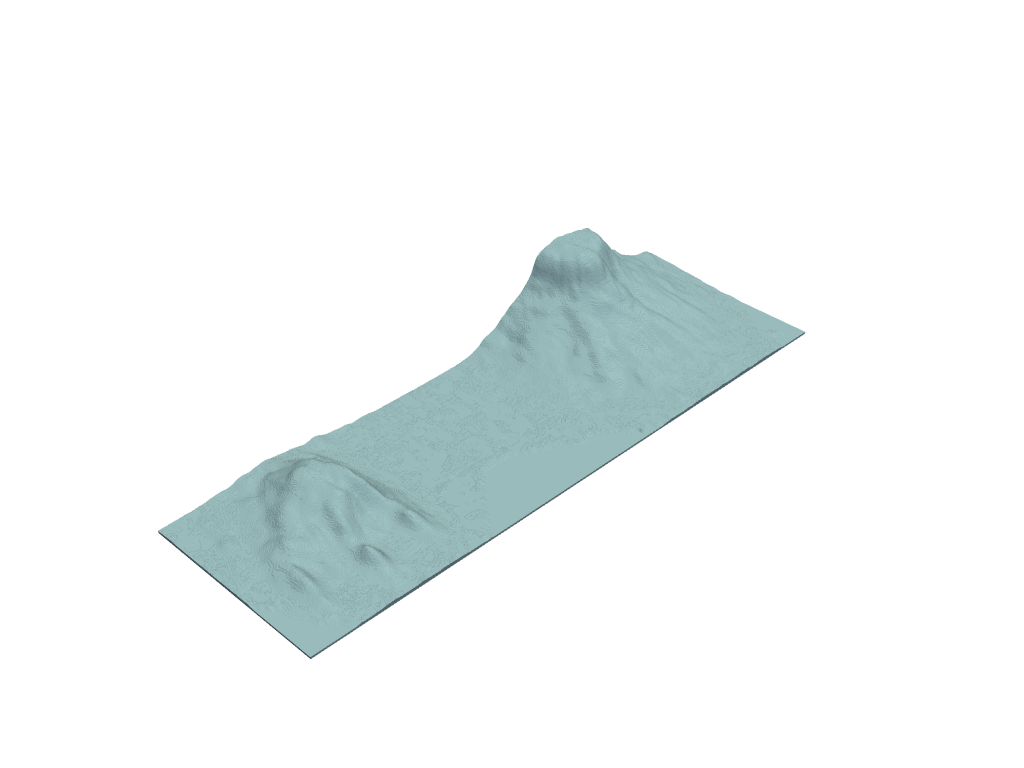

In [100]:
from sigmaepsilon.mesh.downloads import download_badacsony

polydata = download_badacsony(read=True)

polydata.plot(
    notebook=True,
    jupyter_backend="static",
    theme="document",
    lighting=True,
    show_edges=False
    )